# This Exploration Notebook evaluates the dataset.

# Training data exploration

In [2]:
%matplotlib inline
import matplotlib

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np
import cv2
import glob

import logging as log
import sys
log.basicConfig(stream=sys.stderr, level=log.DEBUG)
import pickle

from search_classify import *
from heatmap import *
from lesson_functions import *

In [3]:
cars = glob.glob("data/vehicles/*/*.png")
log.info("Number of cars: " + str(len(cars)))

notcars = glob.glob("data/non-vehicles/*/*.png")
log.info("Number of notcars: " + str(len(notcars)))

INFO:root:Number of cars: 8792
INFO:root:Number of notcars: 8968


Shape of a car (64, 64, 3)
Min/Max of a car 1.0 0.0352941
Shape of a notcar (64, 64, 3)
Min/Max of a notcar 0.756863 0.0


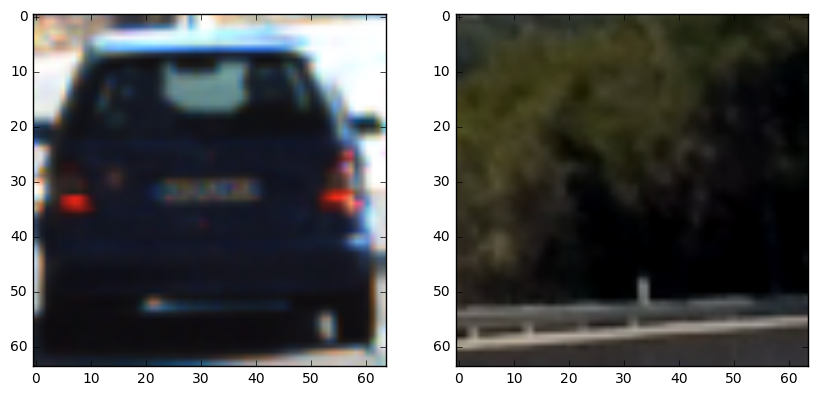

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
car = mpimg.imread(cars[4000])
plt.imshow(car)

plt.subplot(1,2,2)
nocar = mpimg.imread(notcars[4000])
plt.imshow(nocar)

print("Shape of a car", car.shape)
print("Min/Max of a car", np.max(car), np.min(car))
print("Shape of a notcar", nocar.shape)
print("Min/Max of a notcar", np.max(nocar), np.min(nocar))

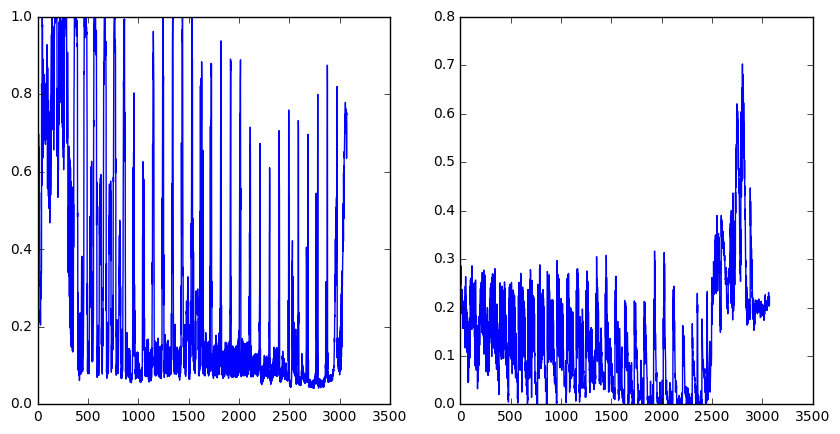

In [5]:
spatial_features_car = bin_spatial(car, size=spatial_size)
spatial_features_nocar = bin_spatial(nocar, size=spatial_size)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(spatial_features_car)

plt.subplot(1,2,2)
plt.plot(spatial_features_nocar)

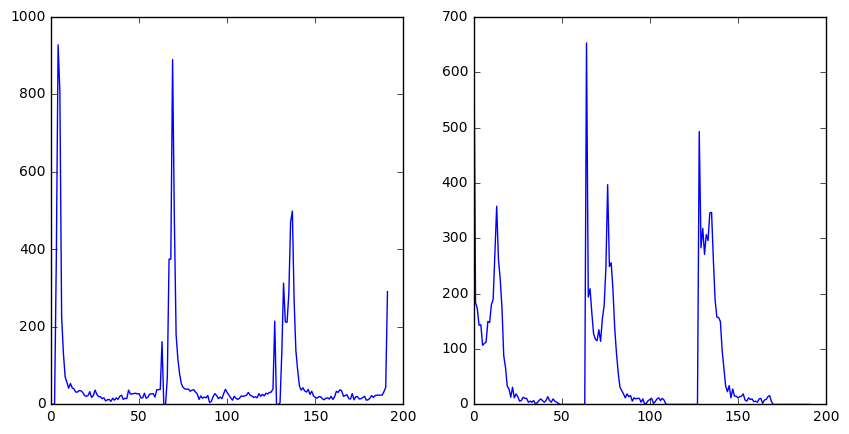

In [6]:
hist_features_car = color_hist(car, nbins=hist_bins, bins_range=(0, 1))
hist_features_nocar = color_hist(nocar, nbins=hist_bins, bins_range=(0, 1))

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(hist_features_car)

plt.subplot(1,2,2)
plt.plot(hist_features_nocar)

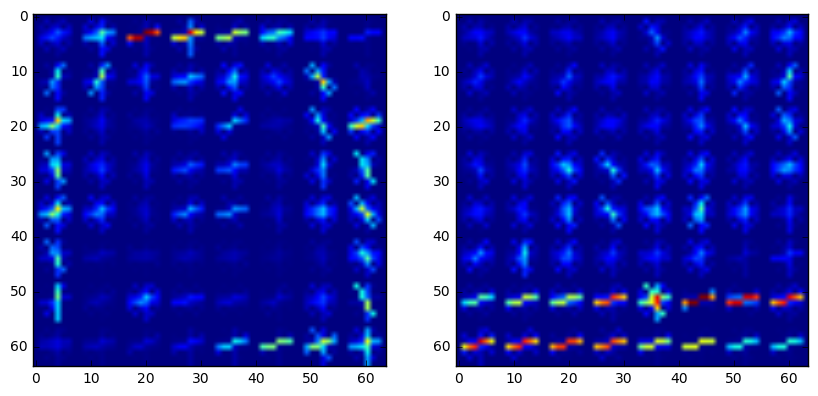

In [7]:
features, hog_image_car = get_hog_features(car[:,:,0],
                                           orient, 
                                           pix_per_cell,
                                           cell_per_block,
                                           vis=True,
                                           feature_vec=True)

features, hog_image_nocar = get_hog_features(nocar[:,:,0],
                                             orient, 
                                             pix_per_cell,
                                             cell_per_block,
                                             vis=True,
                                             feature_vec=True)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(hog_image_car)

plt.subplot(1,2,2)
plt.imshow(hog_image_nocar)

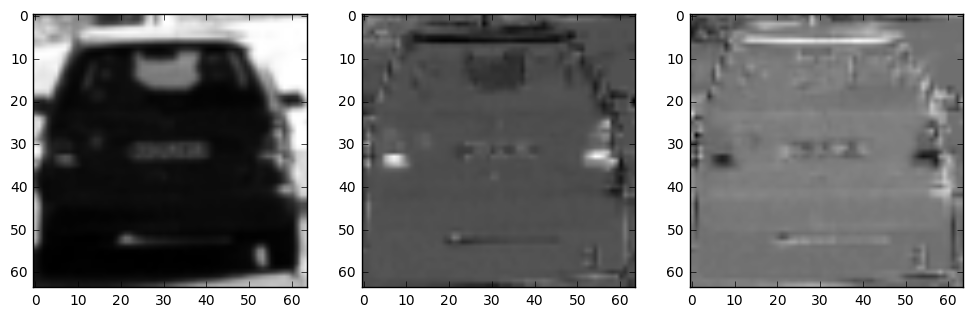

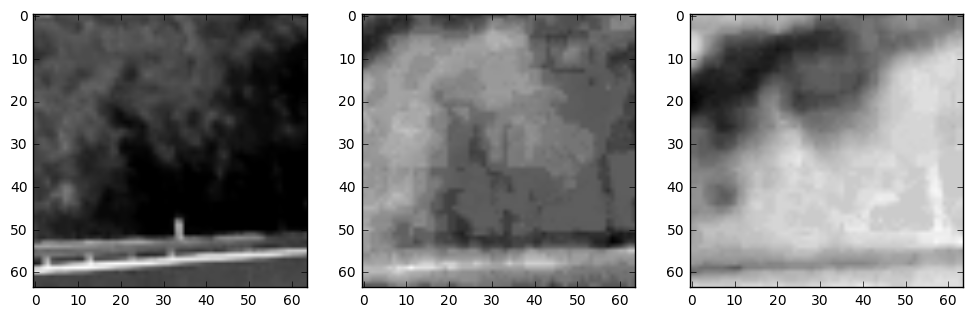

In [8]:
c = cv2.cvtColor(car, cv2.COLOR_RGB2YCrCb)
nc = cv2.cvtColor(nocar, cv2.COLOR_RGB2YCrCb)

plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
plt.imshow(c[:,:,0], cmap="gray")
plt.subplot(1,3,2)
plt.imshow(c[:,:,1], cmap="gray")
plt.subplot(1,3,3)
plt.imshow(c[:,:,2], cmap="gray")

plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
plt.imshow(nc[:,:,0], cmap="gray")
plt.subplot(1,3,2)
plt.imshow(nc[:,:,1], cmap="gray")
plt.subplot(1,3,3)
plt.imshow(nc[:,:,2], cmap="gray")

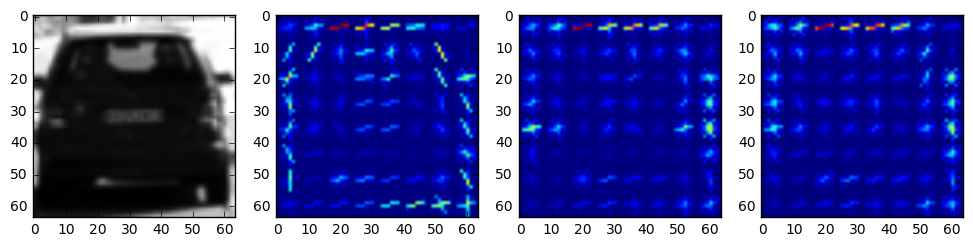

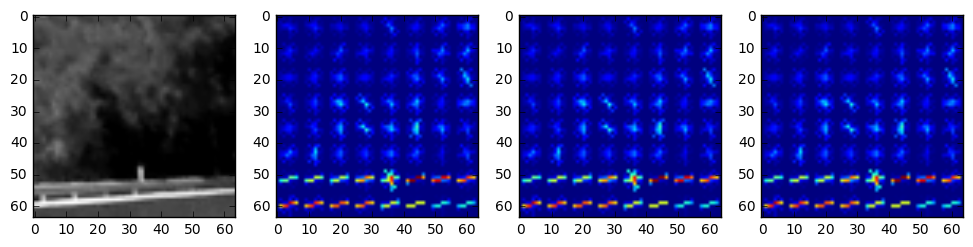

In [9]:
c = cv2.cvtColor(car, cv2.COLOR_RGB2YCrCb)
nc = cv2.cvtColor(nocar, cv2.COLOR_RGB2YCrCb)

sf_c = bin_spatial(c, size=spatial_size)
sp_nc = bin_spatial(nc, size=spatial_size)

feat_c, hog_c0 = get_hog_features(c[:,:,0],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)
feat_c, hog_c1 = get_hog_features(c[:,:,1],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)
feat_c, hog_c2 = get_hog_features(c[:,:,2],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)

feat_c, hog_nc0 = get_hog_features(nc[:,:,0],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)
feat_c, hog_nc1 = get_hog_features(nc[:,:,0],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)
feat_c, hog_nc2 = get_hog_features(nc[:,:,0],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)

plt.figure(figsize=(12, 5))
plt.subplot(1,4,1)
plt.imshow(c[:,:,0], cmap="gray")
plt.subplot(1,4,2)
plt.imshow(hog_c0)
plt.subplot(1,4,3)
plt.imshow(hog_c1)
plt.subplot(1,4,4)
plt.imshow(hog_c2)

plt.figure(figsize=(12, 5))
plt.subplot(1,4,1)
plt.imshow(nc[:,:,0], cmap="gray")
plt.subplot(1,4,2)
plt.imshow(hog_nc0)
plt.subplot(1,4,3)
plt.imshow(hog_nc1)
plt.subplot(1,4,4)
plt.imshow(hog_nc2)

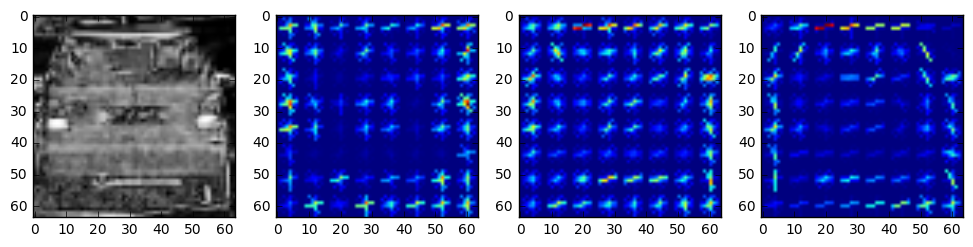

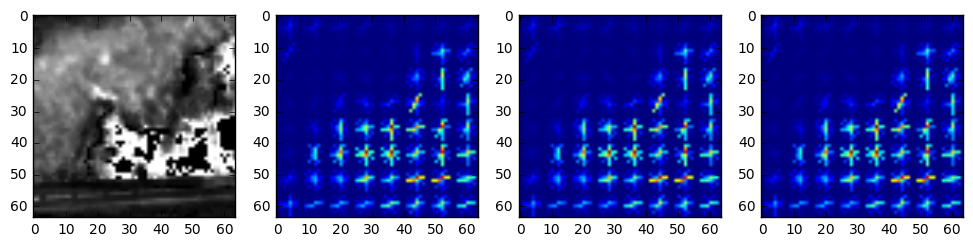

In [10]:
c = cv2.cvtColor(car, cv2.COLOR_RGB2HSV)
nc = cv2.cvtColor(nocar, cv2.COLOR_RGB2HSV)

sf_c = bin_spatial(c, size=spatial_size)
sp_nc = bin_spatial(nc, size=spatial_size)

feat_c, hog_c0 = get_hog_features(c[:,:,0],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)
feat_c, hog_c1 = get_hog_features(c[:,:,1],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)
feat_c, hog_c2 = get_hog_features(c[:,:,2],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)

feat_c, hog_nc0 = get_hog_features(nc[:,:,0],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)
feat_c, hog_nc1 = get_hog_features(nc[:,:,0],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)
feat_c, hog_nc2 = get_hog_features(nc[:,:,0],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)

plt.figure(figsize=(12, 5))
plt.subplot(1,4,1)
plt.imshow(c[:,:,1], cmap="gray")
plt.subplot(1,4,2)
plt.imshow(hog_c0)
plt.subplot(1,4,3)
plt.imshow(hog_c1)
plt.subplot(1,4,4)
plt.imshow(hog_c2)

plt.figure(figsize=(12, 5))
plt.subplot(1,4,1)
plt.imshow(nc[:,:,1], cmap="gray")
plt.subplot(1,4,2)
plt.imshow(hog_nc0)
plt.subplot(1,4,3)
plt.imshow(hog_nc1)
plt.subplot(1,4,4)
plt.imshow(hog_nc2)

# Video image exploration

In [11]:
images = glob.glob("video2images/all/*.png")
log.info("Number of images: " + str(len(images)))

INFO:root:Number of images: 64


1.0 0.0


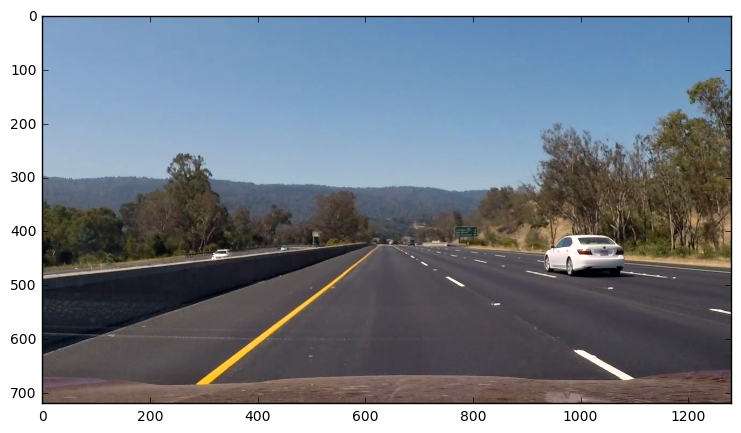

In [12]:
image = mpimg.imread(images[20])

plt.figure(figsize=(10, 5))
plt.imshow(image)
print(np.max(image), np.min(image))

In [13]:
feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

[ 0.60642749  0.41992307  0.59369254 ...,  0.31183922  0.54503363
  0.47369328]
(3072,)


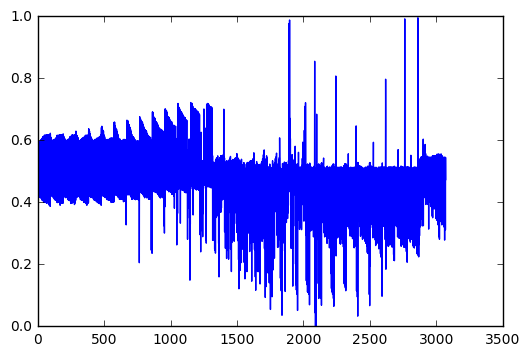

In [14]:
spatial_features = bin_spatial(feature_image, size=spatial_size)

print(spatial_features)
print(spatial_features.shape)

plt.plot(spatial_features)

[  1397    490   1253   1575   2944   5460  12124  13994   6549  10308
   7396   8914   8255  11456  17729  19082  40849  47804  62960  40558
  41977  39119  28028  21907  19042  17124  11630  11618   7246   6253
   4831   8987  17634  24917  21626  32269  25093  40357  33044  30001
  28100  22198  30008  17797  25354  19244   6112    492    506    551
   1068   1004    528    220    236    258    211    279    233    316
    268    410    892   1515      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0    272  71432
 146044  72100  56724  27328  27574  65283 258631  85062  62292  38519
   4324   2023    766    605   1109   1189    306      9      8      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0     29     65    113    340    412
    31

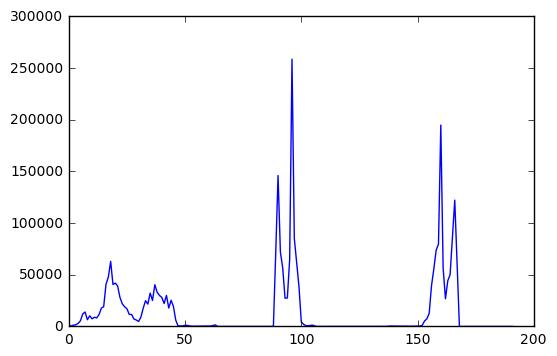

In [15]:
hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=(0, 1))

print(hist_features)
print(hist_features.shape)

plt.plot(hist_features)

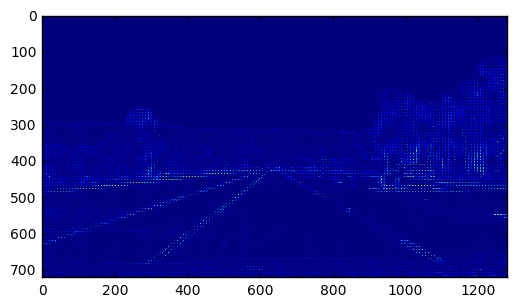

In [16]:
features, hog_image = get_hog_features(feature_image[:,:,0],
                                       orient, 
                                       pix_per_cell,
                                       cell_per_block,
                                       vis=True,
                                       feature_vec=True)

plt.imshow(hog_image)